In [2]:
from utils import plot_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV,train_test_split
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve, auc
from sklearn.preprocessing import StandardScaler,LabelEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# ----- 1.- PREPARACIÓN DE DATOS. DIVISIÓN TRAIN Y TEST -----

In [4]:
# Cargamos el dataframe de los datos a tratar.

In [5]:
data = pd.read_csv("./Practica/airbnb.csv", sep=';', decimal='.')
data.head(10).T

0  \
ID                                                                       11210388   
Listing Url                                 https://www.airbnb.com/rooms/11210388   
Scrape ID                                                          20170306202425   
Last Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
Summary                         Loft in the Hill country 12-15 minutes directl...   
Space                           This loft has a spectacular view of the hills ...   
Description                     Loft in the Hill country 12-15 minutes directl...   
Experiences Offered                                                          none   
Neighborhood Overview           This neighborhood is located in the hills west...   
Notes                           The loft is located on a gated property.  Ther...   
Transit                         There is no public transportation from this lo...   
Access                          The loft is entirely private to the guest as i...   
Interaction                     My wife and I live on the property so we would...   
House Rules                     The loft is entirely private but is adjacent t...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/c351a9b5-5...   
Medium Url                      https://a0.muscache.com/im/pictures/c351a9b5-5...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/c351a9b5-5...   
Host ID                                                                  58386783   
Host URL                               https://www.airbnb.com/users/show/58386783   
Host Name                                                                    John   
Host Since                                                             2016-02-11   
Host Location                   My father was USAF so I was born at Offutt AFB...   
Host About                      I am a High Tech Professional with over 30 yea...   
Host Response Time                                                 within an hour   
Host Response Rate                                                          100.0   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host Picture Url                https://a0.muscache.com/im/pictures/c5c78f08-f...   
Host Neighbourhood                                                            NaN   
Host Listings Count                                                           1.0   
Host Total Listings Count                                                     1.0   
Host Verifications                                        email,phone,reviews,kba   
Street                          Canyon Edge Drive, Austin, TX 78733, United St...   
Neighbourhood                                                                 NaN   
Neighbourhood Cleansed                                                      78733   
Neighbourhood Group Cleansed                                                  NaN   
City                                                                       Austin   
State                                                                          TX   
Zipcode                                                                     78733   
Market                                                                     Austin   
Smart Location                                                         Austin, TX   
Country Code                                                                   US   
Country                                                             United States   
Latitude                                                                30.337361   
Longitude                                                              -97.863277   


In [6]:
# Obtenemos datos generales (shape y dtypes)

In [7]:
print(data.shape)
data.dtypes

(14780, 89)


ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [8]:
# Preparamos datos para TRAIN y TEST (75-25)

In [12]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./Practica/airbnb.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.25, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
data = pd.read_csv('./Practica/airbnb-train.csv',sep=';', decimal='.')


# Ejecuto para train y test y guardamos cada uno (train y test) por separado.
train.to_csv('./Practica/airbnb-train.csv', sep=';', decimal='.', index=False)
test.to_csv('./Practica/airbnb-test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11085, 89)
Dimensiones del dataset de test: (3695, 89)


In [13]:
# ----- 2. ANÁLISIS EXPLORATORIO -----

In [14]:
# Trabajo con el data para train: 

full_df = pd.read_csv('./Practica/airbnb-train.csv', sep=';', decimal='.')
full_df.head(5).T

0  \
ID                                                                        4181571   
Listing Url                                  https://www.airbnb.com/rooms/4181571   
Scrape ID                                                          20170315084710   
Last Scraped                                                           2017-03-15   
Name                            SANT BARTOMEU Apartment  w/ PRIVATE PATIO - SO...   
Summary                         This is a 100% renovated apartment in the hear...   
Space                           This apartment features great location in Soll...   
Description                     This is a 100% renovated apartment in the hear...   
Experiences Offered                                                          none   
Neighborhood Overview           Set in the beautiful village of Soller, the ap...   
Notes                           Please note that if you arrive before 4pm the ...   
Transit                         Buses from the airport run regularly into the ...   
Access                          The living room has T shaped sofa, 2 coffee ta...   
Interaction                     Our team is available on Airbnb App answering ...   
House Rules                     PRESERVE OUR BEACHES (it is yours too). Don’t ...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/2e8daa9e-7...   
Medium Url                      https://a0.muscache.com/im/pictures/2e8daa9e-7...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/2e8daa9e-7...   
Host ID                                                                   4200246   
Host URL                                https://www.airbnb.com/users/show/4200246   
Host Name                                                     Pepe Pisos & Villas   
Host Since                                                             2012-11-20   
Host Location                          Palma de Mallorca, Balearic Islands, Spain   
Host About                      We are Rafael, Sammy, Lis, Karina, Valdete, As...   
Host Response Time                                                 within an hour   
Host Response Rate                                                           97.0   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/pictures/9906ec1b-0...   
Host Picture Url                https://a0.muscache.com/im/pictures/9906ec1b-0...   
Host Neighbourhood                                                        Palacio   
Host Listings Count                                                          68.0   
Host Total Listings Count                                                    68.0   
Host Verifications                             email,phone,facebook,reviews,jumio   
Street                                      Sóller, Balearic Islands 07100, Spain   
Neighbourhood                                                                 NaN   
Neighbourhood Cleansed                                                     Sóller   
Neighbourhood Group Cleansed                                                  NaN   
City                                                                       Sóller   
State                                                            Balearic Islands   
Zipcode                                                                     07100   
Market                                                            Mallorca Island   
Smart Location                                                      Sóller, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                 39.76754   
Longitude                                                                2.716266   


In [15]:
data.describe()

ID     Scrape ID       Host ID  Host Response Rate  \
count  1.108500e+04  1.108500e+04  1.108500e+04         9661.000000   
mean   1.025864e+07  2.017038e+13  3.591538e+07           94.817617   
std    5.558271e+06  5.437992e+08  3.408308e+07           15.194586   
min    1.986400e+04  2.016010e+13  1.745300e+04            0.000000   
25%    5.545662e+06  2.017041e+13  6.890142e+06          100.000000   
50%    1.125196e+07  2.017041e+13  2.473200e+07          100.000000   
75%    1.530871e+07  2.017041e+13  5.431096e+07          100.000000   
max    1.858361e+07  2.017062e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         11083.000000               11083.000000  11085.000000   
mean             12.848868                  12.848868     40.488276   
std              34.751026                  34.751026      4.721665   
min               0.000000                   0.000000    -37.851182   
25%               1.000000                   1.000000     40.409774   
50%               2.000000                   2.000000     40.419335   
75%               6.000000                   6.000000     40.430750   
max             519.000000                 519.000000     55.956716   

          Longitude  Accommodates     Bathrooms      Bedrooms          Beds  \
count  11085.000000  11085.000000  11043.000000  11065.000000  11050.000000   
mean      -3.715292      3.288498      1.288916      1.348305      2.052489   
std       13.868197      2.099247      0.668322      0.907391      1.630873   
min     -122.437371      1.000000      0.000000      0.000000      1.000000   
25%       -3.707543      2.000000      1.000000      1.000000      1.000000   
50%       -3.700769      3.000000      1.000000      1.000000      2.000000   
75%       -3.683986      4.000000      1.000000      2.000000      2.000000   
max      153.371427     16.000000      8.000000     10.000000     16.000000   

       Square Feet         Price  Weekly Price  Monthly Price  \
count   446.000000  11071.000000   2693.000000    2689.000000   
mean    401.845291     74.194111    380.077980    1445.779100   
std     677.080216     72.357472    195.049138    1259.088863   
min       0.000000      9.000000     70.000000     250.000000   
25%       0.000000     34.000000    220.000000     750.000000   
50%      90.000000     56.000000    350.000000    1250.000000   
75%     646.000000     88.000000    500.000000    1750.000000   
max    6997.000000    969.000000    999.000000   25000.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       4758.000000   6557.000000     11085.000000  11085.000000   
mean         188.833123     32.217020         1.582679      7.612088   
std          115.486262     31.204653         1.158321     11.602811   
min            0.000000      0.000000         0.000000      0.000000   
25%          100.000000     15.000000         1.000000      0.000000   
50%          150.000000     25.000000         1.000000      0.000000   
75%          200.000000     40.000000         2.000000     15.000000   
max          990.000000    662.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 30  Availability 60  \
count    11085.000000    11085.000000     11085.000000     11085.000000   
mean         3.135949      970.599278         8.956428        22.960668   
std         13.820053     9694.278443         9.341809        19.775780   
min          1.000000        1.000000         0.000000         0.000000   
25%          1.000000      365.000000         0.000000         4.000000   
50%          2.000000     1125.000000         6.000000        20.000000   
75%          3.000000     1125.000000        14.000000        38.000000   
max       1125.000000  1000000.000000        30.000000        60.000000   

       Availability 90  Availability 365  Number of Reviews  \
count     11085.000000      11085.000000       1108

In [16]:
# Hacemos la visualización del tamaño inicial del train, y el tipo de datos existentes
data.shape

(11085, 89)

In [17]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11085 non-null  int64  
 1   Listing Url                     11085 non-null  object 
 2   Scrape ID                       11085 non-null  int64  
 3   Last Scraped                    11085 non-null  object 
 4   Name                            11084 non-null  object 
 5   Summary                         10638 non-null  object 
 6   Space                           8179 non-null   object 
 7   Description                     11079 non-null  object 
 8   Experiences Offered             11085 non-null  object 
 9   Neighborhood Overview           6863 non-null   object 
 10  Notes                           4254 non-null   object 
 11  Transit                         6795 non-null   object 
 12  Access                          

In [19]:
# ----- 3.- PREPROCESAMIENTO -----

In [20]:
# LIMPIEZA DE DATOS.
# Para ello, me baso en la previsualización del Dataframe, y analizo que hay columnas que no aportan datos de interés (celdas vacías)
# o por duplicidad de información (Geolocation con Altitud-Latitud, Neighbourhood, Neighbourhood Group Cleansed) o porque vienen descripciones
# que posteriormente vienen desglosadas en otras columnas.
# Por ello, pasamos de un dataframe de 89 columnas iniciales a uno más reducido.

In [21]:
# Lo primero, elimino las que considero que no me van a aportar valor en el análisis de datos:

In [22]:
# Para poder analizar mejor las variables vamos a eliminar aquellas que de primera mano sabemos que no nos van a hacer falta: IDs, URLs, Columnas con texto libre, Geolocation (ya que tengo la latitud y longitud por separado), similares
columns_drop = [
    'Host Name','ID', 'Listing Url', 'Scrape ID', 'Name', 'Summary','Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host About', 'Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood', 'License', 'Geolocation',
    'Zipcode','Neighbourhood','Smart Location','Country Code','Neighbourhood Group Cleansed','Street'
]

data = data.drop(columns_drop, axis=1)

In [23]:
# Posteriormente, elimino aquellas que tienen demasiados nulos, y las que no tienen fechas

In [24]:
nulls_to_drop = ['Jurisdiction Names', 'Has Availability', 'Square Feet', 'Host Acceptance Rate', 'First Review', 'Last Review']

data = data.drop(nulls_to_drop, axis=1)

In [25]:
data.shape

(11085, 51)

In [26]:
# También observo que la columna Price tiene bastantes nulls. Esto supone que no pueda verificarsi son correctos, por lo
# que los elimino.

In [27]:
data = data.dropna(subset=['Price'])
data.shape

(11071, 51)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11071 entries, 0 to 11084
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Last Scraped                    11071 non-null  object 
 1   Experiences Offered             11071 non-null  object 
 2   Host Since                      11069 non-null  object 
 3   Host Location                   11042 non-null  object 
 4   Host Response Time              9650 non-null   object 
 5   Host Response Rate              9650 non-null   float64
 6   Host Listings Count             11069 non-null  float64
 7   Host Total Listings Count       11069 non-null  float64
 8   Host Verifications              11066 non-null  object 
 9   Neighbourhood Cleansed          11071 non-null  object 
 10  City                            11067 non-null  object 
 11  State                           10960 non-null  object 
 12  Market                          11028

In [29]:
#Hago un primer análisis por las fechas ("Last Scraped", "Calendar last Scraped" y "Host since") por si hubiera algo de información
# que me pudieran dar.

In [30]:
sorted_df = data.sort_values(by='Last Scraped')
sorted_df['Last Scraped'].head(20)


1732     2016-01-04
4665     2016-01-04
3144     2016-01-04
10910    2016-01-04
959      2016-04-02
5115     2016-04-11
2384     2016-04-11
8011     2016-04-12
9601     2016-04-12
9767     2016-05-04
7747     2016-05-04
6409     2016-05-04
5960     2016-05-18
271      2016-05-21
12       2016-05-21
2214     2016-07-07
1192     2016-07-07
6443     2016-07-07
1541     2016-07-07
11033    2016-07-07
Name: Last Scraped, dtype: object

In [24]:
sorted_df = data.sort_values(by='Calendar last Scraped')
sorted_df['Calendar last Scraped'].head(20)

14779    2016-01-04
6828     2016-01-04
5355     2016-01-04
4521     2016-01-04
13146    2016-01-04
2876     2016-01-04
10728    2016-01-04
1829     2016-01-04
11328    2016-01-04
12235    2016-04-02
2905     2016-04-11
3357     2016-04-11
14284    2016-04-11
1057     2016-04-12
9666     2016-05-04
5353     2016-05-04
5862     2016-05-04
9667     2016-05-04
2874     2016-05-04
10759    2016-05-18
Name: Calendar last Scraped, dtype: object

In [25]:
sorted_df =data.sort_values(by='Host Since')
sorted_df['Host Since'].head(20)

7762     2009-05-17
3320     2009-06-02
2634     2009-06-02
11276    2009-06-02
7039     2009-08-14
5336     2009-08-30
11757    2009-11-12
9361     2009-11-12
9773     2009-11-12
4220     2010-01-13
4675     2010-01-14
7000     2010-01-14
1070     2010-01-19
8255     2010-01-29
5088     2010-01-31
4725     2010-01-31
10494    2010-01-31
6523     2010-01-31
9343     2010-01-31
10533    2010-02-17
Name: Host Since, dtype: object

In [26]:
# Veo que las fechas no me aportan realmente información relevante,pues la información que me dan es de solo 1 año
data = data.drop(['Calendar last Scraped','Last Scraped'], axis=1)

In [27]:
# Vamos ahora con el relleno de los campos nulos.
# Veo primero dónde hay:

In [28]:
data.isnull().any()

Experiences Offered               False
Host Since                         True
Host Location                      True
Host Response Time                 True
Host Response Rate                 True
Host Listings Count                True
Host Total Listings Count          True
Host Verifications                 True
Neighbourhood Cleansed            False
City                               True
State                              True
Market                             True
Country                            True
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                             False
Weekly Price                       True


In [29]:
# HAGO 2 ACCIONES DIFERENTES:

# 1) En las columnas de Price, rellenos con 0
columns_to_fill = ["Weekly Price", "Monthly Price", "Security Deposit", "Cleaning Fee"]
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# 2) En el resto de columnas, los relleno con la media
columns_to_fill_mean = [
    "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
    "Review Scores Value", "Reviews per Month", "Host Response Rate",
    "Host Listings Count", "Host Total Listings Count", "Beds",
    "Calculated host listings count"
]

data[columns_to_fill_mean] = data[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

# Relleno con la mediana para los 2 casos que me quedan de esta columna
data['Host Since'] = data['Host Since'].fillna(data['Host Since'].mode()[0])

In [30]:
# OUTLIERS
# Me centro ahora en la obtención de los outiers

In [31]:
# Miro en primera opción en los bedrooms
data.loc[data['Bedrooms']>7,['Bedrooms','Bathrooms']]

Bedrooms  Bathrooms
289        10.0        6.0
452         8.0        3.0
1181        8.0        4.5
1697       10.0        0.0
1933       10.0        6.5
4662       10.0        3.0
5098       10.0        6.0
5334        8.0        6.5
6378        8.0        5.0
7087        8.0        4.0
9118        8.0        6.0
9934        8.0        3.0
11453      10.0        5.5
11486      10.0        7.0
11774       8.0        3.0
13110       8.0        5.5

In [32]:
# De primeras, parecen datos lógicos. Voy a probar al revés.
data.loc[data['Bathrooms']>6,['Bedrooms','Bathrooms']]

Bedrooms  Bathrooms
505         1.0        8.0
1787        7.0        7.0
1933       10.0        6.5
2035        6.0        7.5
5042        7.0        7.0
5334        8.0        6.5
5828        6.0        6.5
8012        1.0        8.0
11486      10.0        7.0
12332       1.0        8.0
14716       7.0        8.0

In [33]:
# Se aprecia cierta ilógica en varias opciones. Voy a meter las "beds"
data.loc[data['Bedrooms']>6,['Bedrooms','Bathrooms', 'Beds']]

Bedrooms  Bathrooms  Beds
289        10.0        6.0  16.0
452         8.0        3.0   8.0
1181        8.0        4.5  16.0
1280        7.0        6.0   9.0
1697       10.0        0.0   2.0
1787        7.0        7.0   9.0
1933       10.0        6.5  16.0
4117        7.0        4.5  15.0
4662       10.0        3.0  16.0
4855        7.0        6.0  12.0
4977        7.0        4.5  15.0
5042        7.0        7.0   7.0
5098       10.0        6.0  16.0
5334        8.0        6.5  16.0
6378        8.0        5.0  14.0
7087        8.0        4.0  13.0
9118        8.0        6.0   8.0
9119        7.0        5.0  10.0
9934        8.0        3.0  12.0
9969        7.0        3.0  16.0
10344       7.0        4.5   9.0
10754       7.0        5.0  13.0
11453      10.0        5.5   1.0
11486      10.0        7.0  16.0
11774       8.0        3.0  13.0
13110       8.0        5.5  14.0
14716       7.0        8.0  11.0

In [34]:
# Se aprecian varias incongruencias con las camas y habitaciones
# Descarto aquellos con menos camas que habitaciones a partir de 7 habitaciones y menos de 7 camas
data = data[data['Bedrooms']<8]

In [35]:
# CODIFICACIÓN DE VARIABLES

In [36]:
data.head(10).T

0  \
Experiences Offered                                                          none   
Host Since                                                             2016-02-11   
Host Location                   My father was USAF so I was born at Offutt AFB...   
Host Response Time                                                 within an hour   
Host Response Rate                                                          100.0   
Host Listings Count                                                           1.0   
Host Total Listings Count                                                     1.0   
Host Verifications                                        email,phone,reviews,kba   
Neighbourhood Cleansed                                                      78733   
City                                                                       Austin   
State                                                                          TX   
Market                                                                     Austin   
Country                                                             United States   
Latitude                                                                30.337361   
Longitude                                                              -97.863277   
Property Type                                                                Loft   
Room Type                                                         Entire home/apt   
Accommodates                                                                    2   
Bathrooms                                                                     1.0   
Bedrooms                                                                      1.0   
Beds                                                                          1.0   
Bed Type                                                                 Real Bed   
Amenities                       TV,Cable TV,Internet,Wireless Internet,Air con...   
Price                                                                        58.0   
Weekly Price                                                                  0.0   
Monthly Price                                                                 0.0   
Security Deposit                                                            100.0   
Cleaning Fee                                                                  0.0   
Guests Included                                                                 1   
Extra People                                                                    0   
Minimum Nights                                                                  2   
Maximum Nights                                                               1125   
Calendar Updated                                                            today   
Availability 30                                                                10   
Availability 60                                                                34   
Availability 90                                                                64   
Availability 365                                                              281   
Number of Reviews                                                              42   
Review Scores Rating                                                         98.0   
Review Scores Accuracy                                                       10.0   
Review Scores Cleanliness                                                    10.0   
Review Scores Checkin                                                        10.0   
Review Scores Communication                                                  10.0   
Review Scores Location                                                       10.0   
Review Scores Value                                                          10.0   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                1.0   


In [37]:
# Para mejorar el análisis de los datos, genero las LabelEncoder,y convertirlos en datos numéricos.
# Lo aplico en varias columnas:

In [41]:

 from sklearn.preprocessing import LabelEncoder

le_bed_type = LabelEncoder()
data["Bed Type"] = le_bed_type.fit_transform(data["Bed Type"])

le_room_type = LabelEncoder()
data["Room Type"] = le_room_type.fit_transform(data["Room Type"])

le_property_type = LabelEncoder()
data["Property Type"] = le_property_type.fit_transform(data["Property Type"])

le_neighbourhood_cleansed = LabelEncoder()
data["Neighbourhood Cleansed"] = le_neighbourhood_cleansed.fit_transform(data["Neighbourhood Cleansed"])

le_city = LabelEncoder()
data["City"] = le_city.fit_transform(data["City"])

le_country = LabelEncoder()
data["Country"] = le_country.fit_transform(data["Country"])

le_state = LabelEncoder()
data["State"] = le_state.fit_transform(data["State"])

le_market = LabelEncoder()
data["Market"] = le_market.fit_transform(data["Market"])

le_host_verifications = LabelEncoder()
data["Host Verifications"] = le_host_verifications.fit_transform(data["Host Verifications"])

le_experiences_offered = LabelEncoder()
data["Experiences Offered"] = le_experiences_offered.fit_transform(data["Experiences Offered"])

le_amenities = LabelEncoder()
data["Amenities"] = le_amenities.fit_transform(data["Amenities"])

le_calendar_updated = LabelEncoder()
data["Calendar Updated"] = le_calendar_updated.fit_transform(data["Calendar Updated"])

le_host_response_time = LabelEncoder()
data["Host Response Time"] = le_host_response_time.fit_transform(data["Host Response Time"])

le_host_location = LabelEncoder()
data["Host Location"] = le_host_location.fit_transform(data["Host Location"])

le_cancellation_policy = LabelEncoder()
data["Cancellation Policy"] = le_cancellation_policy.fit_transform(data["Cancellation Policy"])

le_features = LabelEncoder()
data["Features"] = le_features.fit_transform(data["Features"])

In [48]:
from datetime import datetime

data['Host Since'] = data['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
data['Host Year'] = data['Host Since'].apply(lambda x: x.year - 2009) #Año del primer valor
data['Host Month'] = data['Host Since'].apply(lambda x: x.month)
data = data.drop(['Host Since'], axis=1)

In [ ]:
# CORRELACIÓN

In [ ]:
# Hago el estudio comparativo de variables entre todas.

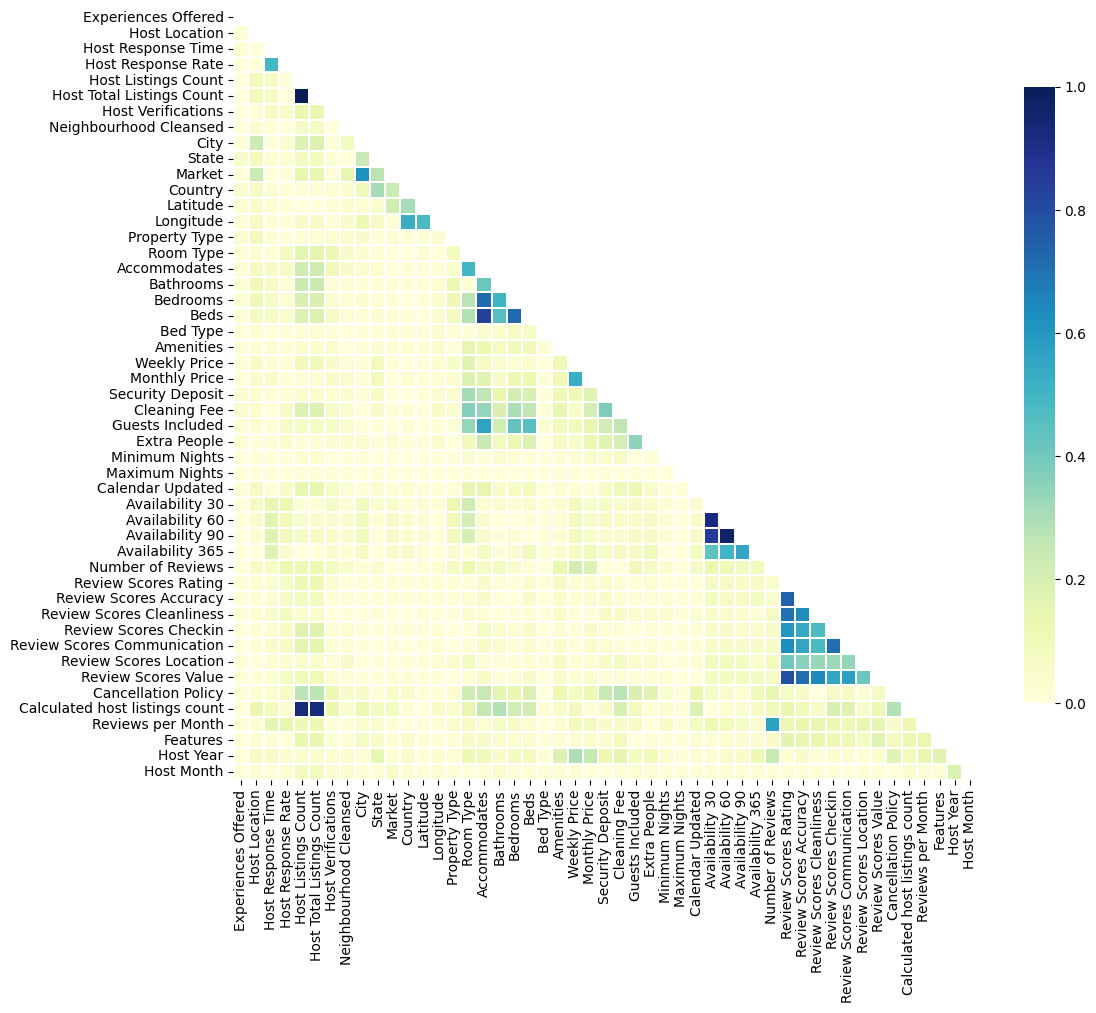

In [49]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
# En la visual se aprecian varias variables semejantes.
# Esto facilita la reducción del propio dataframe, para seguir optimizando los datos para analizar.

In [50]:
corr_to_remove = [
    'Host Total Listings Count', 'Accommodates', 'Beds', 'Monthly Price', 'Availability 60', 'Availability 90',
    'Availability 365', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
    'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
    'Calculated host listings count', 'Reviews per Month',
]

data = data.drop(corr_to_remove, axis=1)

In [ ]:
# CÁLCULO DE RELACIÓN ENTRE VARIABLES

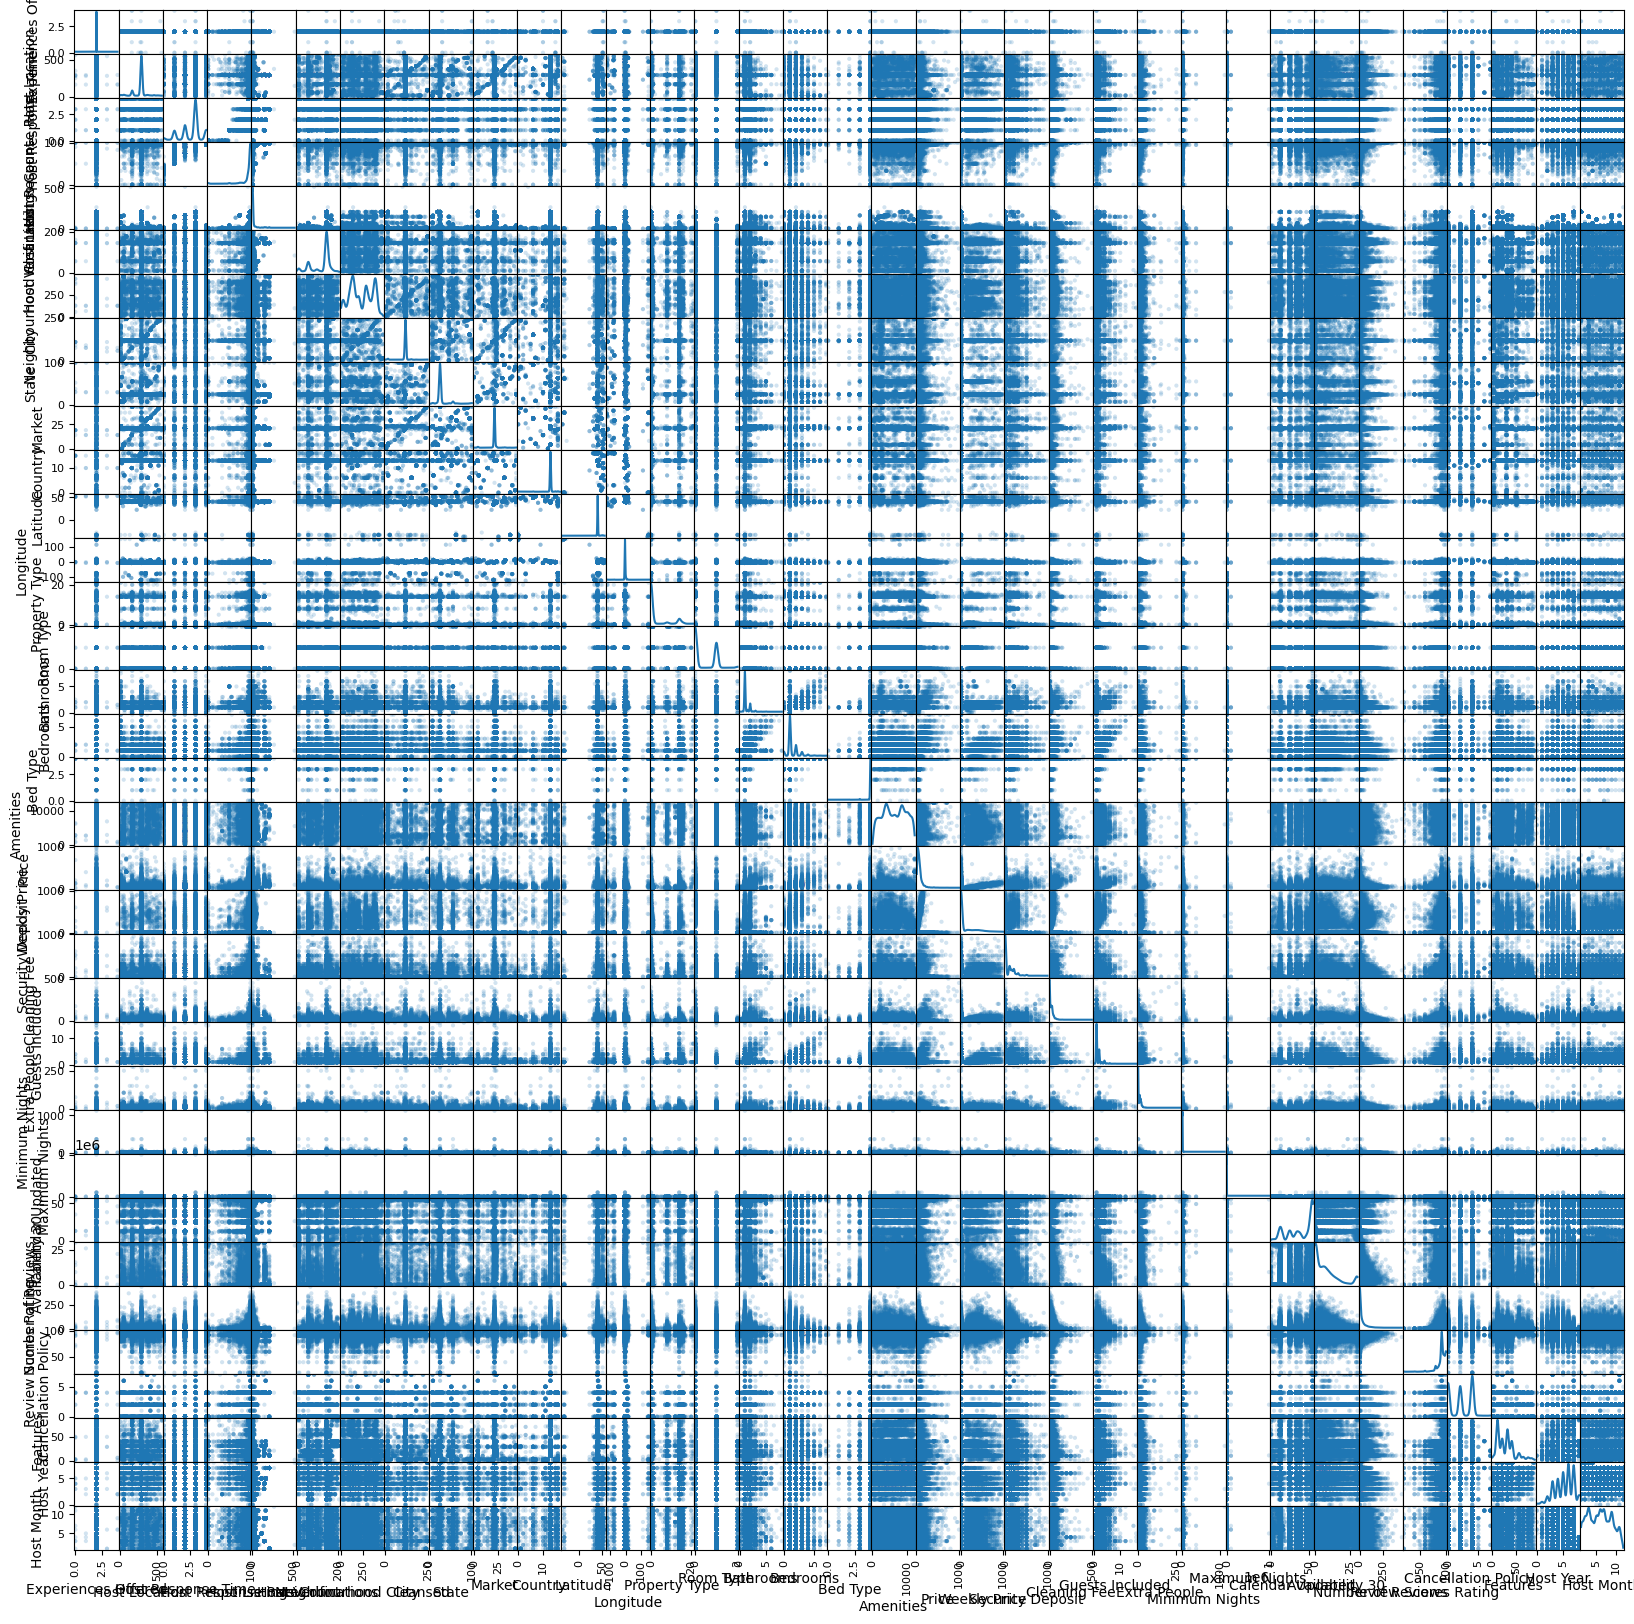

In [51]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [ ]:
# No consigo sacar una conclusión clara sobre las relaciones, ya que son demasiadas para analizar.

In [ ]:
# GENERACIÓN DE VARIABLES
# Voy a generar un par de variables, con el objetivo de buscar una simplicidad de datos.
# Opto por unir Beds y Extra People, y convertir el Bedrooms squared en m2

In [53]:
data['Bed_Extra_people']   = data['Bedrooms']*data['Extra People']

In [54]:
data['Bedrooms_squared'] = data['Bedrooms'].apply(lambda x: x**2)

In [ ]:
# ----- 4.- MODELADO: CROSS VALIDATION, EVALUACIÓN ----- 

In [ ]:
# CROSS VALIDATION
# Con esto busco que con todas las acciones realizadas en train, pueda realizarlas tanto en train como en test.
# Con esto, probaré en varios modelos, con el objetivo de encontrar cuál ofrece me accuracy.
# Sigo tomando la variables "Price" como la variable deducible en ambos casos.
#Cojo tanto los datos de train como de test, y aplico mismas transformaciones.

In [70]:
# DATOS TRAIN:

data = pd.read_csv('./Practica/airbnb-train.csv',sep=';', decimal='.')

data = data.dropna(subset=['Price'])

columns_to_drop = [
    'Host Name','ID', 'Listing Url', 'Scrape ID', 'Name', 'Summary','Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host About', 'Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood', 'License', 'Geolocation',
    'Zipcode','Neighbourhood','Smart Location','Country Code','Neighbourhood Group Cleansed','Street'
]
data = data.drop(columns_to_drop, axis=1)

nulls_to_drop = ['Jurisdiction Names', 'Has Availability', 'Square Feet', 'Host Acceptance Rate', 'First Review', 'Last Review']
data = data.drop(nulls_to_drop, axis=1)

data = data.drop(['Calendar last Scraped','Last Scraped'], axis=1)

columns_to_fill = ["Weekly Price", "Monthly Price", "Security Deposit", "Cleaning Fee"]
data[columns_to_fill] = data[columns_to_fill].fillna(0)
columns_to_fill_mean = [
    "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
    "Review Scores Value", "Reviews per Month", "Host Response Rate",
    "Host Listings Count", "Host Total Listings Count", "Beds",
    "Calculated host listings count"
]
data[columns_to_fill_mean] = data[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))
data['Host Since'] = data['Host Since'].fillna(data['Host Since'].mode()[0])
data['Host Since'] = data['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
data['Host Year'] = data['Host Since'].apply(lambda x: x.year - 2009) #Año del primer valor
data['Host Month'] = data['Host Since'].apply(lambda x: x.month)
data = data.drop(['Host Since'], axis=1)

data = data[data['Bathrooms']<8]
data = data[data['Bedrooms']<8]

from sklearn.preprocessing import LabelEncoder

le_bed_type = LabelEncoder()
data["Bed Type"] = le_bed_type.fit_transform(data["Bed Type"])

le_room_type = LabelEncoder()
data["Room Type"] = le_room_type.fit_transform(data["Room Type"])

le_property_type = LabelEncoder()
data["Property Type"] = le_property_type.fit_transform(data["Property Type"])

le_neighbourhood_cleansed = LabelEncoder()
data["Neighbourhood Cleansed"] = le_neighbourhood_cleansed.fit_transform(data["Neighbourhood Cleansed"])

le_city = LabelEncoder()
data["City"] = le_city.fit_transform(data["City"])

le_country = LabelEncoder()
data["Country"] = le_country.fit_transform(data["Country"])

le_state = LabelEncoder()
data["State"] = le_state.fit_transform(data["State"])

le_market = LabelEncoder()
data["Market"] = le_market.fit_transform(data["Market"])

le_host_verifications = LabelEncoder()
data["Host Verifications"] = le_host_verifications.fit_transform(data["Host Verifications"])

le_experiences_offered = LabelEncoder()
data["Experiences Offered"] = le_experiences_offered.fit_transform(data["Experiences Offered"])

le_amenities = LabelEncoder()
data["Amenities"] = le_amenities.fit_transform(data["Amenities"])

le_calendar_updated = LabelEncoder()
data["Calendar Updated"] = le_calendar_updated.fit_transform(data["Calendar Updated"])

le_host_response_time = LabelEncoder()
data["Host Response Time"] = le_host_response_time.fit_transform(data["Host Response Time"])

le_host_location = LabelEncoder()
data["Host Location"] = le_host_location.fit_transform(data["Host Location"])

le_cancellation_policy = LabelEncoder()
data["Cancellation Policy"] = le_cancellation_policy.fit_transform(data["Cancellation Policy"])

le_features = LabelEncoder()
data["Features"] = le_features.fit_transform(data["Features"])

corr_to_remove = [
    'Host Total Listings Count', 'Accommodates', 'Beds', 'Monthly Price', 'Availability 60', 'Availability 90',
    'Availability 365', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
    'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
    'Calculated host listings count', 'Reviews per Month',
]
data = data.drop(corr_to_remove, axis=1)

data['Bed_Extra_people']   = data['Bedrooms']*data['Extra People']
data['Bedrooms_squared'] = data['Bedrooms'].apply(lambda x: x**2)

In [71]:
# Ahora cojo los datos de test:

In [74]:
# DATOS TEST:

data_test = pd.read_csv('./Practica/airbnb-test.csv', sep=';', decimal='.')

data_test = data_test.dropna(subset=['Price'])

columns_to_drop = [
    'Host Name', 'ID', 'Listing Url', 'Scrape ID', 'Name', 'Summary', 'Space', 'Description', 
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 
    'Host About', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'License', 
    'Geolocation', 'Zipcode', 'Neighbourhood', 'Smart Location', 'Country Code', 
    'Neighbourhood Group Cleansed', 'Street'
]
data_test = data_test.drop(columns_to_drop, axis=1)

nulls_to_drop = ['Jurisdiction Names', 'Has Availability', 'Square Feet', 'Host Acceptance Rate', 
                 'First Review', 'Last Review']

data_test = data_test.drop(nulls_to_drop, axis=1)
data_test = data_test.drop(['Calendar last Scraped', 'Last Scraped'], axis=1)

columns_to_fill = ["Weekly Price", "Monthly Price", "Security Deposit", "Cleaning Fee"]
data_test[columns_to_fill] = data_test[columns_to_fill].fillna(0)

columns_to_fill_mean = [
    "Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness",
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location",
    "Review Scores Value", "Reviews per Month", "Host Response Rate", 
    "Host Listings Count", "Host Total Listings Count", "Beds",
    "Calculated host listings count"
]
data_test[columns_to_fill_mean] = data_test[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

data_test['Host Since'] = data_test['Host Since'].fillna(data_test['Host Since'].mode()[0])
data_test['Host Since'] = data_test['Host Since'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data_test['Host Year'] = data_test['Host Since'].apply(lambda x: x.year - 2009) 
data_test['Host Month'] = data_test['Host Since'].apply(lambda x: x.month)
data_test = data_test.drop(['Host Since'], axis=1)

data_test = data_test[data_test['Bathrooms'] < 8]
data_test = data_test[data_test['Bedrooms'] < 8]

from sklearn.preprocessing import LabelEncoder

encoders = {
    "Bed Type": LabelEncoder(),
    "Room Type": LabelEncoder(),
    "Property Type": LabelEncoder(),
    "Features": LabelEncoder(),
    "Cancellation Policy": LabelEncoder(),
    "Calendar Updated": LabelEncoder(),
    "Amenities": LabelEncoder(),
    "Neighbourhood Cleansed": LabelEncoder(),
    "Country": LabelEncoder(),
    "City": LabelEncoder(),
    "State": LabelEncoder(),
    "Market": LabelEncoder(),
    "Host Verifications": LabelEncoder(),
    "Experiences Offered": LabelEncoder(),
    "Host Response Time": LabelEncoder(),
    "Host Location": LabelEncoder(),
}

for column, le in encoders.items():
    data_test[column] = le.fit_transform(data_test[column])

corr_to_remove = [
    'Accommodates', 'Monthly Price', 'Reviews per Month',  
    'Availability 60', 'Availability 90', 'Availability 365', 
    'Review Scores Cleanliness', 'Review Scores Accuracy', 
    'Review Scores Communication', 'Review Scores Location', 
    'Review Scores Checkin', 'Review Scores Value',
    'Host Total Listings Count', 'Calculated host listings count', 'Beds'
]
data_test = data_test.drop(corr_to_remove, axis=1)

data_test['Bedrooms_squared'] = data_test['Bedrooms'].apply(lambda x: x**2)
data_test['Bed_Extra_people']   = data_test['Bedrooms']*data_test['Extra People']

In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Definir las características (excluyendo la variable objetivo 'Price')
features = data.drop(['Price'], axis=1).columns

# Dividir características y variable objetivo
X_train = data[features].values
y_train = data['Price'].values

X_test = data_test[features].values
y_test = data_test['Price'].values

# Escalamiento con StandardScaler
scaler = StandardScaler().fit(X_train)  # Ajustar solo en el conjunto de entrenamiento
Xs_train = scaler.transform(X_train)   # Transformar los datos de entrenamiento
Xs_test = scaler.transform(X_test)     # Transformar los datos de prueba

# Verificación de las dimensiones de los datos escalados
print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

# Media de la variable objetivo
print('Media de precio en train: %0.3f' % np.mean(y_train))
print('Media de precio en test:  %0.3f' % np.mean(y_test))

Datos train:  (10997, 36)
Datos test:   (3667, 36)
Media de precio en train: 73.967
Media de precio en test:  70.918


In [ ]:
# Genero el modelo LASSO

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.16768329368110083; total time=   0.0s
[CV] END ..........................alpha=0.167

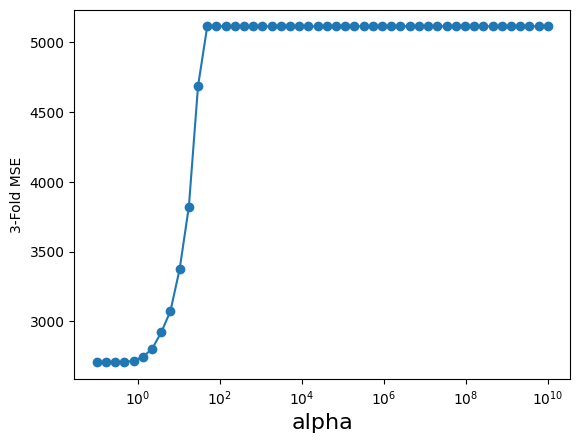

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(Xs_train,y_train)

print("Train: ",lasso.score(Xs_train,y_train))
print("Test: ",lasso.score(Xs_test,y_test))

ytrainLasso = lasso.predict(Xs_train)
ytestLasso  = lasso.predict(Xs_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = data.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

Train:  0.47993372738272133
Test:  0.42479081283327624
MSE Modelo Lasso (train): 2.66e+03
MSE Modelo Lasso (test) : 2.7e+03
RMSE Modelo Lasso (train): 51.6
RMSE Modelo Lasso (test) : 51.9
Host Location -1.378418103427206
Host Response Time -5.0649275101687605
Host Response Rate 3.3681811318260673
Host Listings Count -1.587975708589586
Host Verifications 5.696588955600723
Neighbourhood Cleansed 0.7546794594484902
City 0.6175754297889975
State 10.03993779650098
Market 12.616324675285387
Country -11.459698613683363
Latitude -1.4812930196115905
Longitude -4.778555952782448
Property Type -3.382535215105534
Room Type 1.1126856885679772
Bathrooms -17.32224945328479
Bedrooms 10.64697482633418
Bed Type 1.8846058754653878
Amenities -0.0
Price -0.0
Weekly Price -0.9651999010151777
Security Deposit -0.06007676830739253
Cleaning Fee 16.35198456043325
Guests Included 0.5500748831411951
Extra People -0.26612391830390486
Minimum Nights -0.10951725434174335
Maximum Nights -0.0
Calendar Updated -0.0
Ava

In [ ]:
# Ahora pruebo con DECISION TREE

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

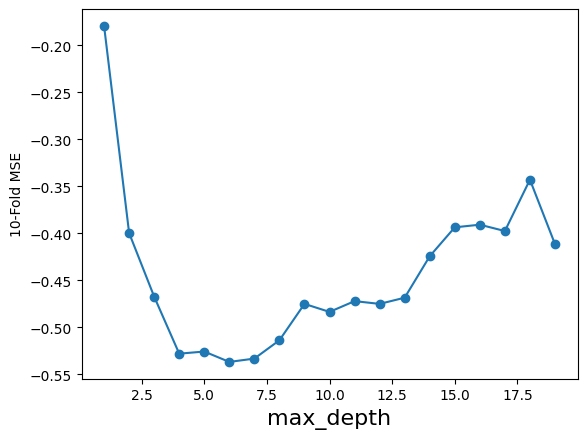

In [78]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(-grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [79]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(Xs_train,y_train)

print("Train: ",treeModel.score(Xs_train,y_train))
print("Test: ",treeModel.score(Xs_test,y_test))

ytrainTree = treeModel.predict(Xs_train)
ytestTree  = treeModel.predict(Xs_test)
mseTrainModelTree = mean_squared_error(y_train,ytrainTree)
mseTestModelTree = mean_squared_error(y_test,ytestTree)

print('MSE Modelo Decision Tree (train): %0.3g' % mseTrainModelTree)
print('MSE Modelo Decision Tree (test) : %0.3g' % mseTestModelTree)

Train:  0.6977572750165526
Test:  0.10562725739594925
MSE Modelo Decision Tree (train): 1.54e+03
MSE Modelo Decision Tree (test) : 4.19e+03


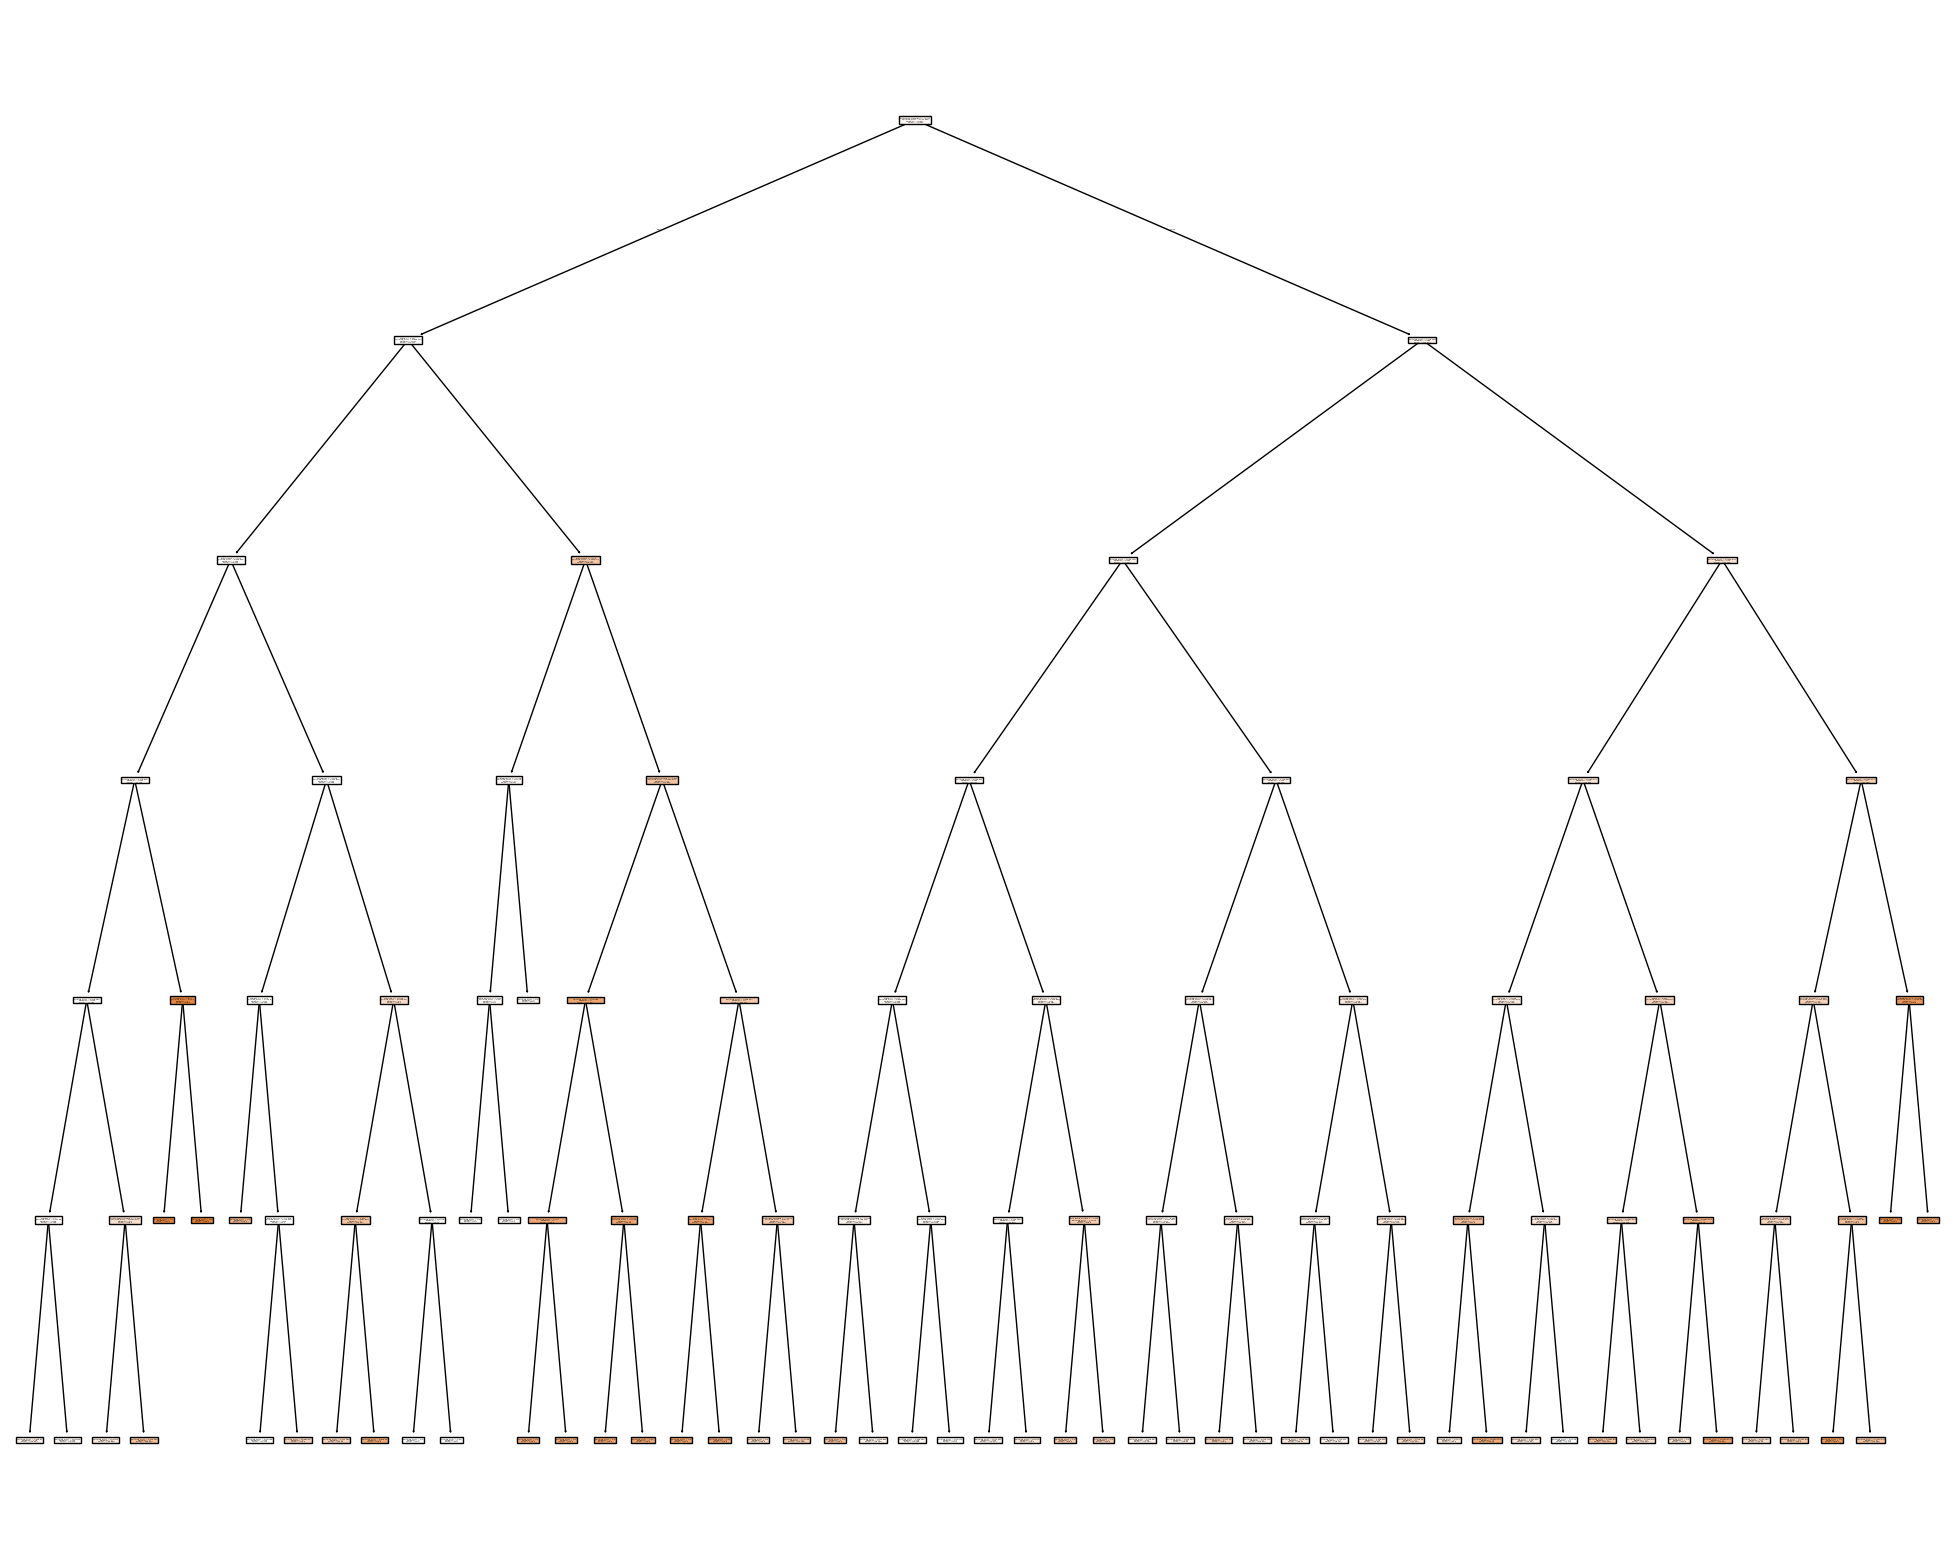

In [80]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeModel, feature_names=feature_names, filled=True)

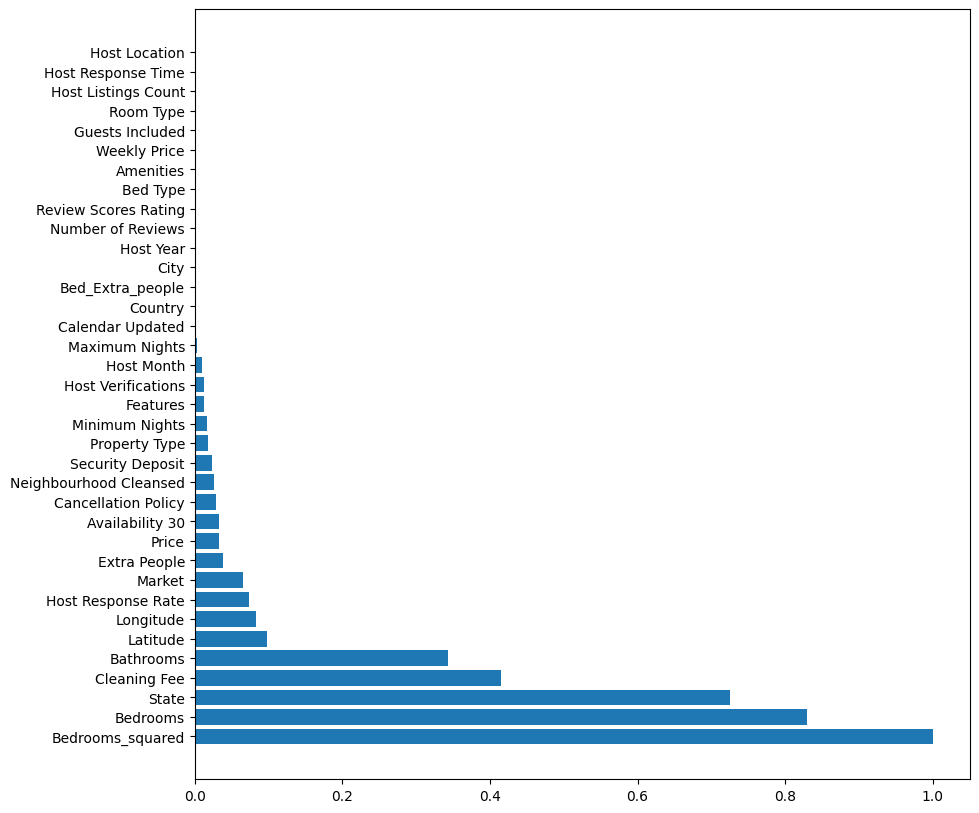

In [81]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(Xs_train.shape[1]),importances[indices])
plt.yticks(range(Xs_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
# RANDOM FOREST

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.6s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.6s
[CV] END ........................................max_depth=3; total time=   0.6s
[CV] END ........................................max_depth=3; total time=   0.6s
[CV] END ........................................max_depth=4; total time=   0.8s
[CV] END ........................................max_depth=4; total time=   0.7s
[CV] END .......................................

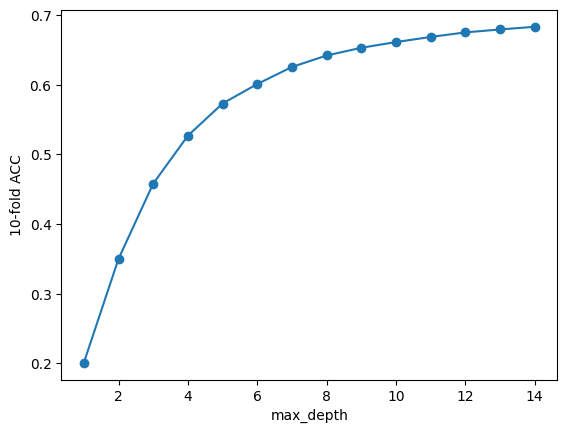

In [82]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [83]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)

print("Train: ",randomForest.score(Xs_train,y_train))
print("Test: ",randomForest.score(Xs_test,y_test))

ytrainRF = randomForest.predict(Xs_train)
ytestRF  = randomForest.predict(Xs_test)
mseTrainModelRF = mean_squared_error(y_train,ytrainRF)
mseTestModelRF = mean_squared_error(y_test,ytestRF)

print('MSE Modelo Decision Tree (train): %0.3g' % mseTrainModelRF)
print('MSE Modelo Decision Tree (test) : %0.3g' % mseTestModelRF)

Train:  0.9008072602928291
Test:  0.4802604022336562
MSE Modelo Decision Tree (train): 507
MSE Modelo Decision Tree (test) : 2.44e+03


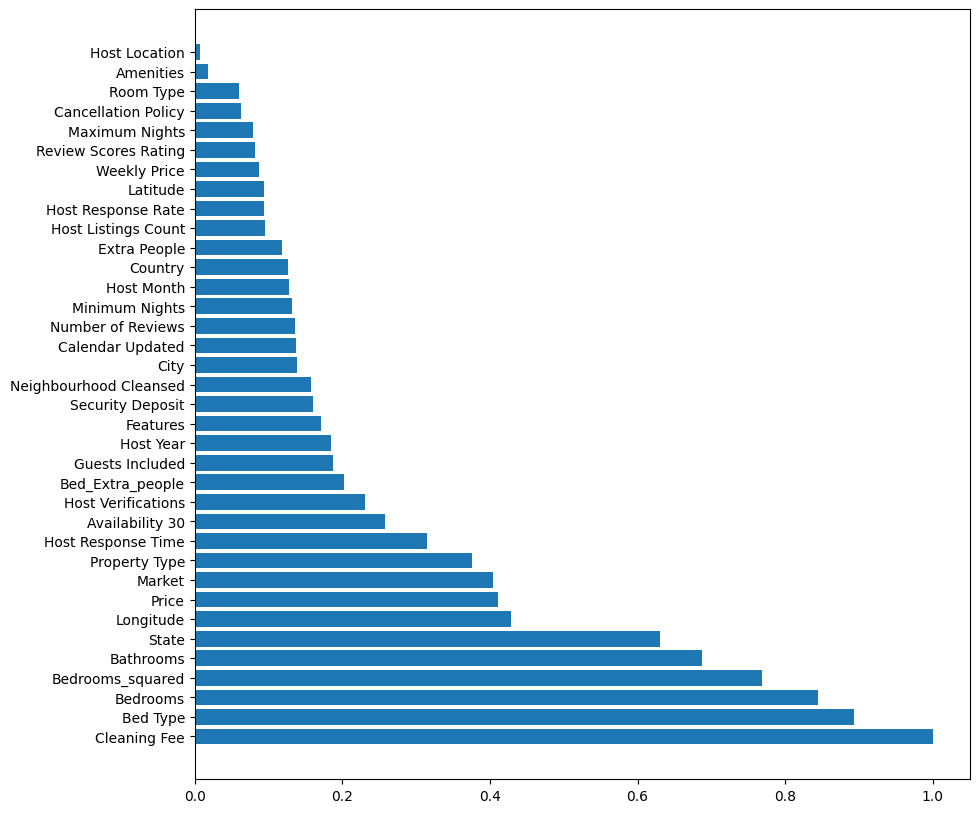

In [84]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(Xs_train.shape[1]),importances[indices])
plt.yticks(range(Xs_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
# GRADIENT BOOST

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(Xs_train, y_train)


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=  10.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=  10.4s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=  10.5s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  22.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  20.8s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  21.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  32.1s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  31.8s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  31.6s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  41.8s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  41.2s
[CV] END ...............learning_rate=0.1, n_esti

Train:  0.902219548630016
Test:  0.5760430145317283
MSE Modelo Boosting Tree (train): 500
MSE Modelo Boosting Tree (test) : 2.44e+03


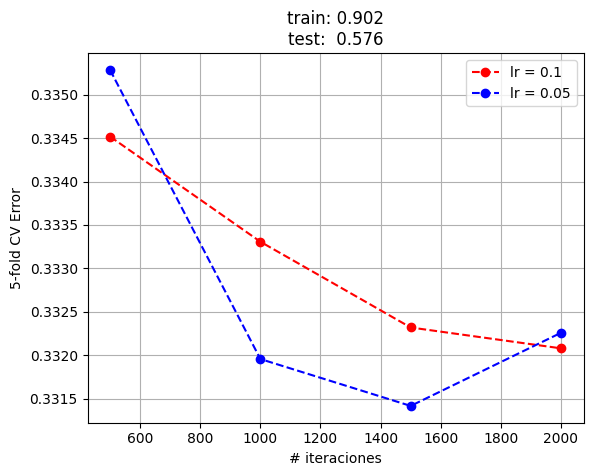

In [86]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(Xs_train,y_train)
print("Train: ",bt.score(Xs_train,y_train))
print("Test: ",bt.score(Xs_test,y_test))

ytrainBF = bt.predict(Xs_train)
ytestBF  = bt.predict(Xs_test)
mseTrainModelRF = mean_squared_error(y_train,ytrainBF)
mseTestModelRF = mean_squared_error(y_test,ytestRF)

print('MSE Modelo Boosting Tree (train): %0.3g' % mseTrainModelRF)
print('MSE Modelo Boosting Tree (test) : %0.3g' % mseTestModelRF)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

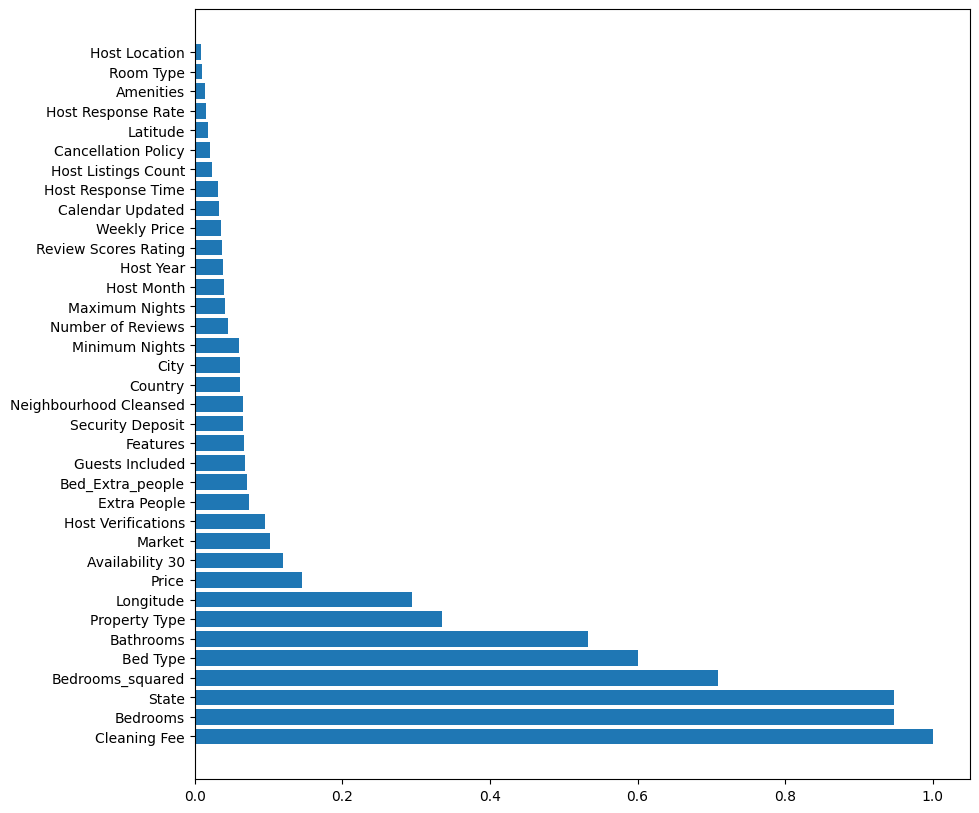

In [87]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
# ----- 5.- CONCLUSIÓN -----

# En los diferentes modelos se obtienen datos bastante bajos.
# LASSO: 
# Train:  0.47993372738272133 - Test:  0.42479081283327624

# RANDOM FOREST:
# Train:  0.9008072602928291 - Test:  0.4802604022336562

# GRADIENT BOOSTED:
# Train:  0.902219548630016 - Test:  0.5760430145317283

# Pese a que sus valores son más bajos comparados con las otras opciones, mi decisión sería coger Lasso, ya que tiene menor
# diferencia entre su train y test.
# Con esta decisión, lo idóneo ahora sería poder acotar más los datos, para obtener mejores resultados.